# Hyperexp varimpo

In [ ]:
import math
p = [.1, .9]
lmd = [2.0,2.5]

mean = 0
mean_squared = 0
for i in range(0,len(lmd)):
  mean += p[i]/lmd[i]
  mean_squared += (2*p[i])/(lmd[i]*lmd[i])

var = mean_squared - mean*mean
cvar = math.sqrt(var)/mean
print('mean',mean)
print('var',var)
print('var_alt',2*math.sqrt(p[0]*p[1])*(1/lmd[0] + 1/lmd[1]))
print('cvar',cvar)

p_hat = .5 * (1 - math.sqrt((cvar*cvar - 1)/(cvar*cvar +1)))
lmd1_hat = 2*p[0]
lmd2_hat = 2*p[1]

print('p_hat',p_hat)
print('lmd1_hat',lmd1_hat)
print('lmd2_hat',lmd2_hat)



mean 0.41
var 0.16990000000000005
var_alt 0.5400000000000001
cvar 1.005339699781705
p_hat 0.4635121808442104
lmd1_hat 0.2
lmd2_hat 1.8


# Param gen

In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def gen(min,max):
    return round(np.random.uniform(min,max),4)

In [3]:
params = []

for i in range(0,100):
    p = gen(0,1)
    l1 = gen(2.0,7.0)
    l2 = gen(0.001,5.0)

    mean_inp = round(p/l1 + (1.0-p)/l2,4)
    mean_sq_inp = (2*p)/(l1*l1) + (2*(1-p))/(l2*l2)
    var_inp = mean_sq_inp - mean_inp*mean_inp
    cvar_inp = math.sqrt(var_inp)/mean_inp

    mu1 = gen(mean_inp,mean_inp+5.0)
    alpha = gen(0,5.0)
    mu2 = gen(0,5.0)
    sigma = gen(0.001,2)

    prm = {
        'p':p,
        'l1':l1,
        'l2':l2,
        'mu1':mu1,
        'mu2':mu2,
        'alpha':alpha,
        'sigma':sigma,
        'cvar':cvar_inp,
    }
    params.append(prm)


In [4]:
df = pd.DataFrame(params)

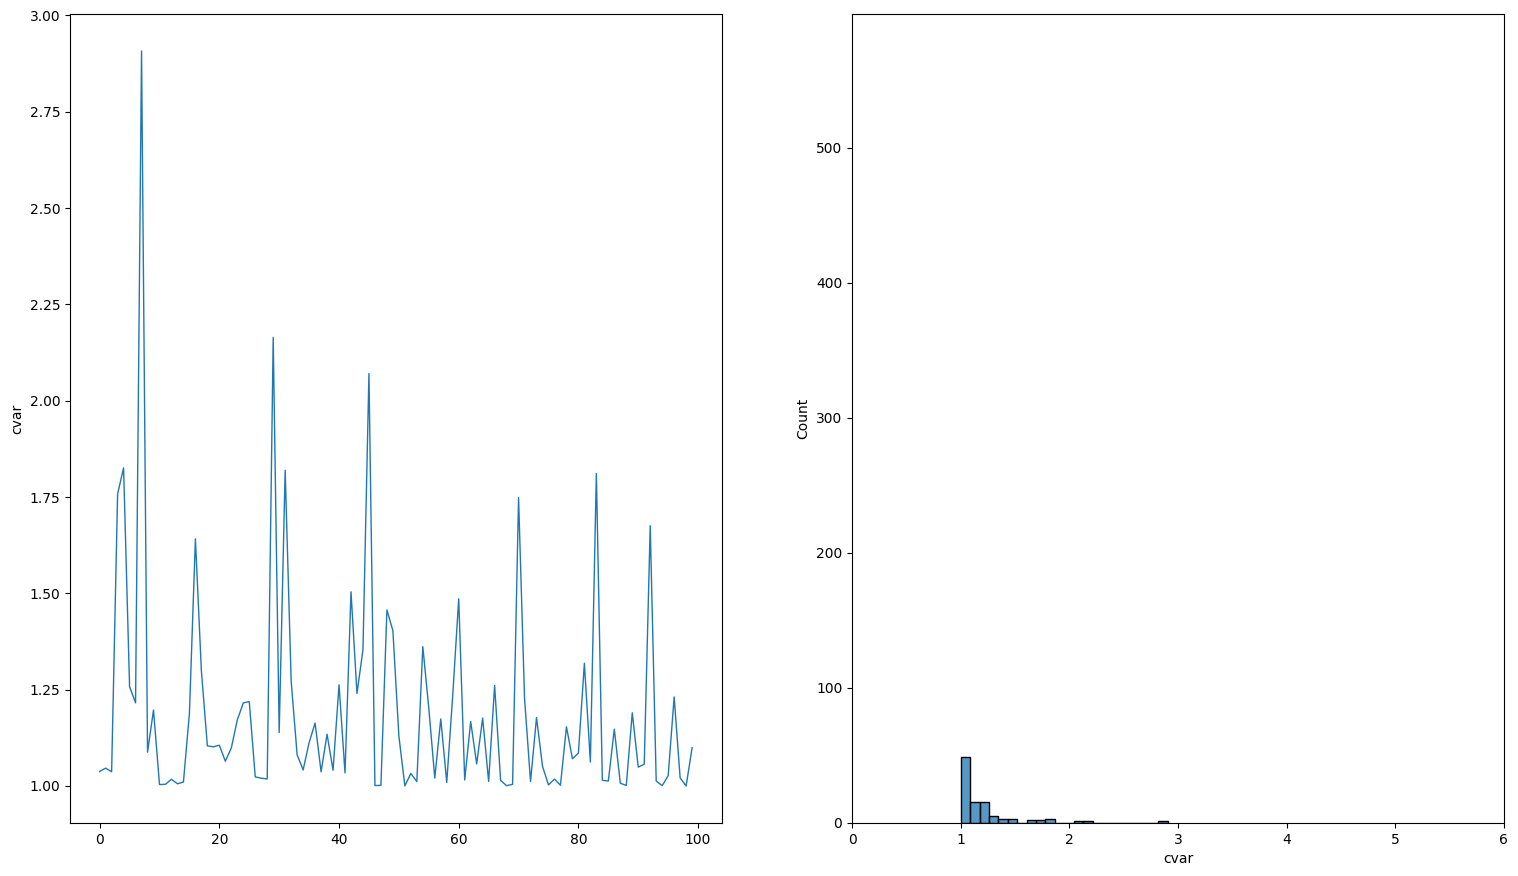

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
sns.lineplot( data=df['cvar'],lw=1,legend=False,ax=ax[0])
sns.histplot( data=df['cvar'],lw=1,legend=False,ax=ax[1])
ax[1].set_xlim(0, 6)
ax[1].set_ylim(0, 599)
plt.show()

In [6]:
import subprocess
import json
import numpy as np
res = []
procs = []


completed_count = 0
m_index = 0
for p in params:
    procs.append(subprocess.Popen(' '.join(['python','run_h.py',str(p['p']),str(p['l1']),str(p['l2']),str(p['sigma']),str(p['mu1'])]),shell=True))
    m_index +=1
    if m_index>100:
        procs[0].wait()
        m_index-=1
        procs.pop(0)
        completed_count+=1
        print(f'Completed: {completed_count}',end="\r",flush=True)


for p in procs:
    p.wait()
    completed_count+=1
    print(f'Completed: {completed_count}',end="\r",flush=True)

/media/storage/miniconda_env/default/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/media/storage/miniconda_env/default/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/media/storage/miniconda_env/default/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/media/storage/miniconda_env/default/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/media/storage/miniconda_env/default/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi 

In [12]:
from os import listdir
from os.path import isfile, join
for f in [f for f in listdir('results/') if isfile(join('results/', f))]:
    with open(f'results/{f}','r',encoding='utf-8') as ff:
        res.append(json.load(ff))

In [13]:
df_res = pd.DataFrame(res)

In [15]:
df_res

,input_intensity,orbit_intesity,node_intensity,os_distr,os_mean,os_std,os_var,os_q95,os_q99,wt_distr,wt_bins,wt_mean,wt_std,wt_var,wt_q95,wt_q99
0,"[0.7593, 3.1069, 2.2722]",1.2777,5.3175,"[0.010402154194843315, 0.024849754164531345, 0...",8.875239,5.760670,0.649072,NaN,12.0,"[0.3868951146098634, 0.13961565177124335, 0.10...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.256778,4.108592,1.261551,11.622404,18.748640
1,"[0.1955, 4.5306, 2.2066]",0.3538,4.6692,"[0.0008514652886238613, 0.00016581445102978562...",24.983391,10.103007,0.404389,51.0,26.0,"[0.2881619937694704, 0.05763239875389408, 0.05...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",10.097706,12.915855,1.279088,37.158267,56.875044
2,"[0.1568, 5.9126, 2.3273]",0.1893,5.0803,"[0.0003705844506685838, 1.1189664575068644e-05...",40.751185,11.327367,0.277964,18.0,43.0,"[0.3032994923857868, 0.03934010152284264, 0.03...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",15.425002,20.400492,1.322560,56.726796,90.435337
3,"[0.5018, 4.5468, 4.769]",1.9155,3.9003,"[0.00011670661969409952, 0.0008882824217782109...",457.856248,322.406014,0.704164,106.0,855.0,"[0.01673271686481726, 0.01023778071334214, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",138.794878,157.698189,1.136196,457.989632,725.649323
4,"[0.0597, 3.1382, 3.7485]",0.8686,3.1684,"[0.0007356899339106212, 6.192321997290634e-05,...",432.166886,333.494049,0.771679,963.0,505.0,"[0.01755091103965702, 0.00710075026795284, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",185.211699,201.409572,1.087456,600.519330,926.320032
5,"[0.0149, 6.9102, 4.4101]",1.8651,4.0751,"[0.0003654431169706404, 1.0193014053895465e-05...",483.120173,207.447207,0.429390,514.0,606.0,"[0.022249690976514216, 0.014158894257781773, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",108.044963,121.766400,1.126997,356.370609,563.049770
6,"[0.9764, 4.4164, 1.8014]",0.2978,3.1872,"[0.00010614229597054266, 0.0001658106906625125...",231.591779,319.926296,1.381423,962.0,429.0,"[0.02194124209743399, 0.005950167348456675, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",276.239530,281.952224,1.020680,872.141294,1218.822761
7,"[0.9539, 5.5438, 3.1952]",0.5228,3.5796,"[0.00017444380612149693, 0.0006759291575626024...",134.888043,269.628654,1.998907,583.0,330.0,"[0.014068597247894846, 0.0051345245430273155, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",358.512185,352.597031,0.983501,1110.597849,1486.210426
8,"[0.9934, 3.9561, 4.904]",1.0211,2.8715,"[0.0006283670981202187, 0.0006417877707135547,...",215.013739,307.694250,1.431045,39.0,856.0,"[0.015041633091592801, 0.00550631211388665, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",285.861155,295.952803,1.035303,920.267583,1286.956165
9,"[0.0286, 3.2894, 3.0575]",1.7852,3.2692,"[0.0009959990732791894, 0.0016918191783489782,...",48.429059,28.407489,0.586579,15.0,31.0,"[0.11190767616716209, 0.05997552019583843, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.364845,20.541341,1.255211,57.163721,98.830696


In [18]:
from scipy import interpolate

def inttp(row):
    #dd = json.loads(row['os_distr'])
    #q = json.loads(row['os_q95'])[1]
    dd = row['os_distr']
    q = row['os_q95']
    f = interpolate.interp1d( dd,list(range(0,len(dd))), fill_value='extrapolate')
    return f(q)

df_res['os_q95'] = df_res.apply(inttp,axis=1)

In [20]:
df_res

,input_intensity,orbit_intesity,node_intensity,os_distr,os_mean,os_std,os_var,os_q95,os_q99,wt_distr,wt_bins,wt_mean,wt_std,wt_var,wt_q95,wt_q99
0,"[0.7593, 3.1069, 2.2722]",1.2777,5.3175,"[0.010402154194843315, 0.024849754164531345, 0...",8.875239,5.760670,0.649072,nan,12.0,"[0.3868951146098634, 0.13961565177124335, 0.10...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.256778,4.108592,1.261551,11.622404,18.748640
1,"[0.1955, 4.5306, 2.2066]",0.3538,4.6692,"[0.0008514652886238613, 0.00016581445102978562...",24.983391,10.103007,0.404389,-60058.11396459265,26.0,"[0.2881619937694704, 0.05763239875389408, 0.05...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",10.097706,12.915855,1.279088,37.158267,56.875044
2,"[0.1568, 5.9126, 2.3273]",0.1893,5.0803,"[0.0003705844506685838, 1.1189664575068644e-05...",40.751185,11.327367,0.277964,-54575183.28152255,43.0,"[0.3032994923857868, 0.03934010152284264, 0.03...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",15.425002,20.400492,1.322560,56.726796,90.435337
3,"[0.5018, 4.5468, 4.769]",1.9155,3.9003,"[0.00011670661969409952, 0.0008882824217782109...",457.856248,322.406014,0.704164,-140364.08903690815,855.0,"[0.01673271686481726, 0.01023778071334214, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",138.794878,157.698189,1.136196,457.989632,725.649323
4,"[0.0597, 3.1382, 3.7485]",0.8686,3.1684,"[0.0007356899339106212, 6.192321997290634e-05,...",432.166886,333.494049,0.771679,-7126654.473487686,505.0,"[0.01755091103965702, 0.00710075026795284, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",185.211699,201.409572,1.087456,600.519330,926.320032
5,"[0.0149, 6.9102, 4.4101]",1.8651,4.0751,"[0.0003654431169706404, 1.0193014053895465e-05...",483.120173,207.447207,0.429390,146389632.55907273,606.0,"[0.022249690976514216, 0.014158894257781773, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",108.044963,121.766400,1.126997,356.370609,563.049770
6,"[0.9764, 4.4164, 1.8014]",0.2978,3.1872,"[0.00010614229597054266, 0.0001658106906625125...",231.591779,319.926296,1.381423,13552745517.407076,429.0,"[0.02194124209743399, 0.005950167348456675, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",276.239530,281.952224,1.020680,872.141294,1218.822761
7,"[0.9539, 5.5438, 3.1952]",0.5228,3.5796,"[0.00017444380612149693, 0.0006759291575626024...",134.888043,269.628654,1.998907,-519229670.1760744,330.0,"[0.014068597247894846, 0.0051345245430273155, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",358.512185,352.597031,0.983501,1110.597849,1486.210426
8,"[0.9934, 3.9561, 4.904]",1.0211,2.8715,"[0.0006283670981202187, 0.0006417877707135547,...",215.013739,307.694250,1.431045,-186460.8610605658,856.0,"[0.015041633091592801, 0.00550631211388665, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",285.861155,295.952803,1.035303,920.267583,1286.956165
9,"[0.0286, 3.2894, 3.0575]",1.7852,3.2692,"[0.0009959990732791894, 0.0016918191783489782,...",48.429059,28.407489,0.586579,144595.71646112014,31.0,"[0.11190767616716209, 0.05997552019583843, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.364845,20.541341,1.255211,57.163721,98.830696


In [21]:
import warnings
warnings.simplefilter(action='ignore')

In [23]:
orb_dict = {}
for index, row in df_res.iterrows():
    orb_dict[str(index)] = row['os_distr']


df_orbit_size = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in orb_dict.items() ]))


In [24]:
df_orbit_size.describe(percentiles=[0.90,0.95,0.99])

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,0.001000,0.001000,0.001000,8.395010e-04,7.739578e-04,0.001000,4.384182e-04,2.597445e-04,4.365787e-04,0.001000
std,0.007530,0.005489,0.004888,9.786434e-04,9.098532e-04,0.001196,4.401561e-04,2.399178e-04,4.467335e-04,0.003207
min,0.000000,0.000000,0.000000,5.749811e-07,4.681707e-07,0.000000,4.123653e-07,4.995166e-08,1.686566e-08,0.000000
50%,0.000000,0.000000,0.000000,5.660011e-04,5.160698e-04,0.000526,3.007579e-04,1.918018e-04,3.042309e-04,0.000000
90%,0.000000,0.000000,0.000000,1.880239e-03,1.735559e-03,0.002574,1.037450e-03,5.861608e-04,1.006972e-03,0.002656
95%,0.000000,0.002007,0.002098,2.728630e-03,2.247746e-03,0.003385,1.314911e-03,7.360235e-04,1.269145e-03,0.009020
99%,0.043962,0.036360,0.030755,4.503787e-03,4.088520e-03,0.005348,2.013302e-03,1.129613e-03,2.090485e-03,0.016176
max,0.091930,0.049366,0.037711,8.973695e-03,8.767689e-03,0.007386,2.720056e-03,1.387734e-03,3.366650e-03,0.019866


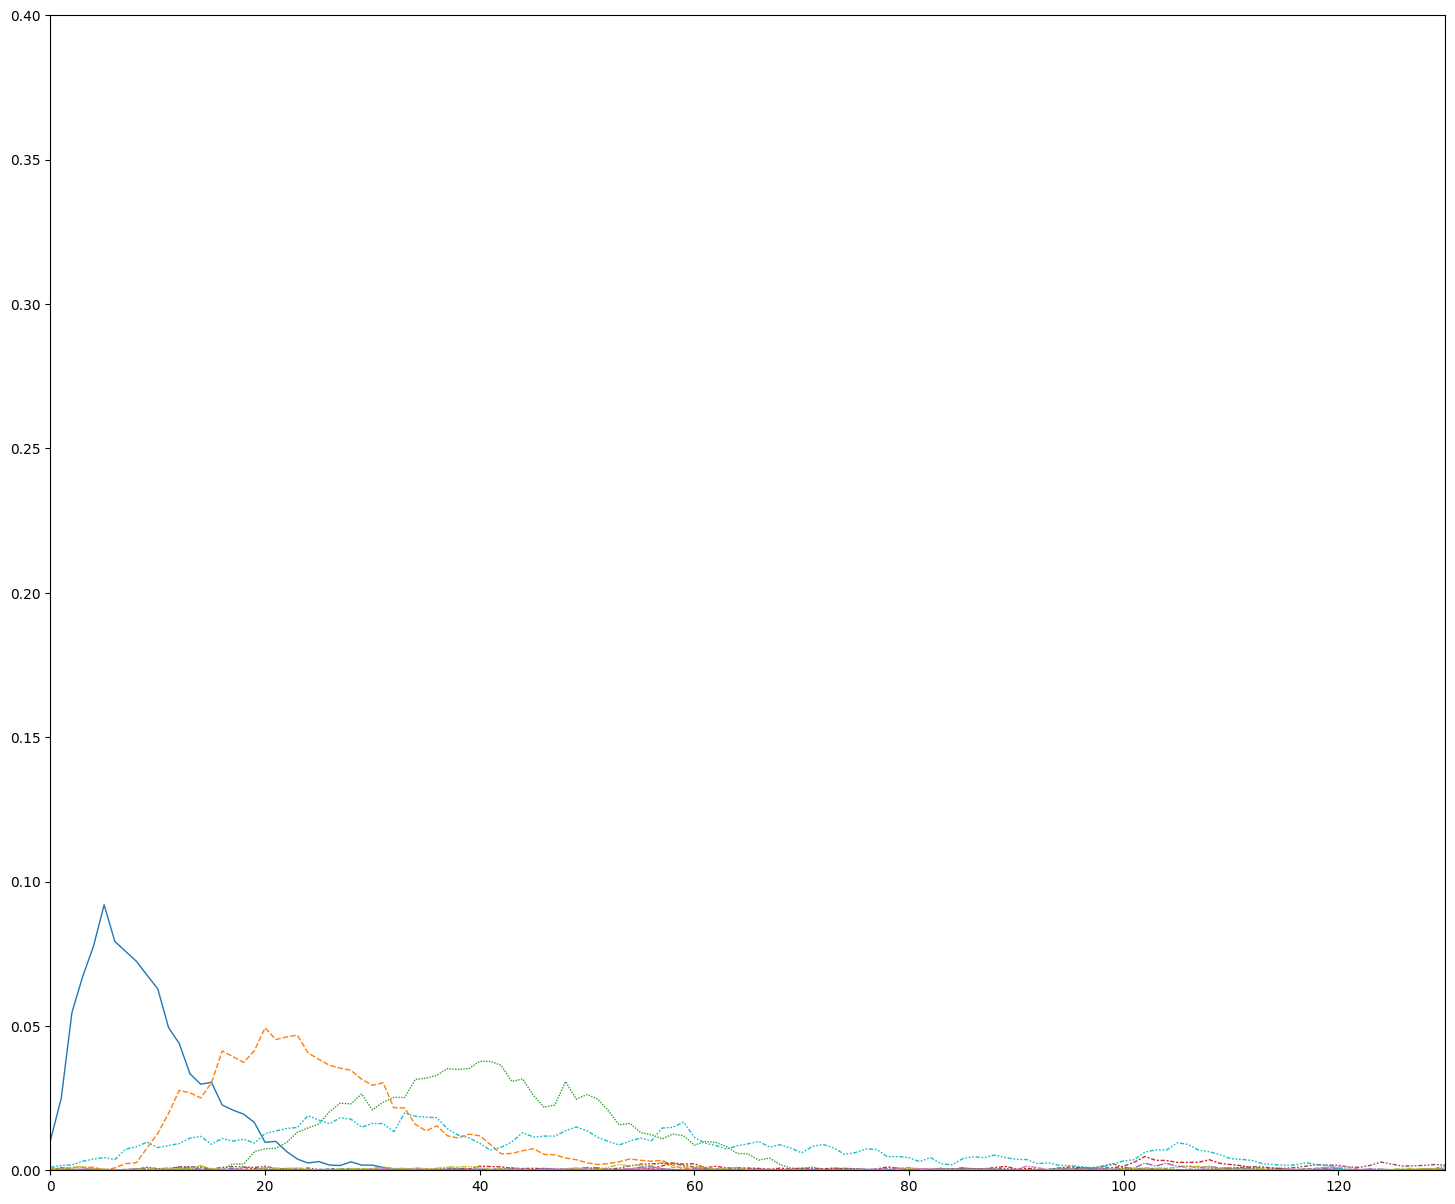

In [25]:
fig, ax = plt.subplots(figsize=(18, 15))
fig = sns.lineplot( data=df_orbit_size,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.4)
plt.show()

Распределение времени ожидания

In [27]:
wait_dict = {}
for index, row in df_res.iterrows():
    wait_dict[str(index)] = row['wt_distr']

df_wait_time = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in wait_dict.items() ]))

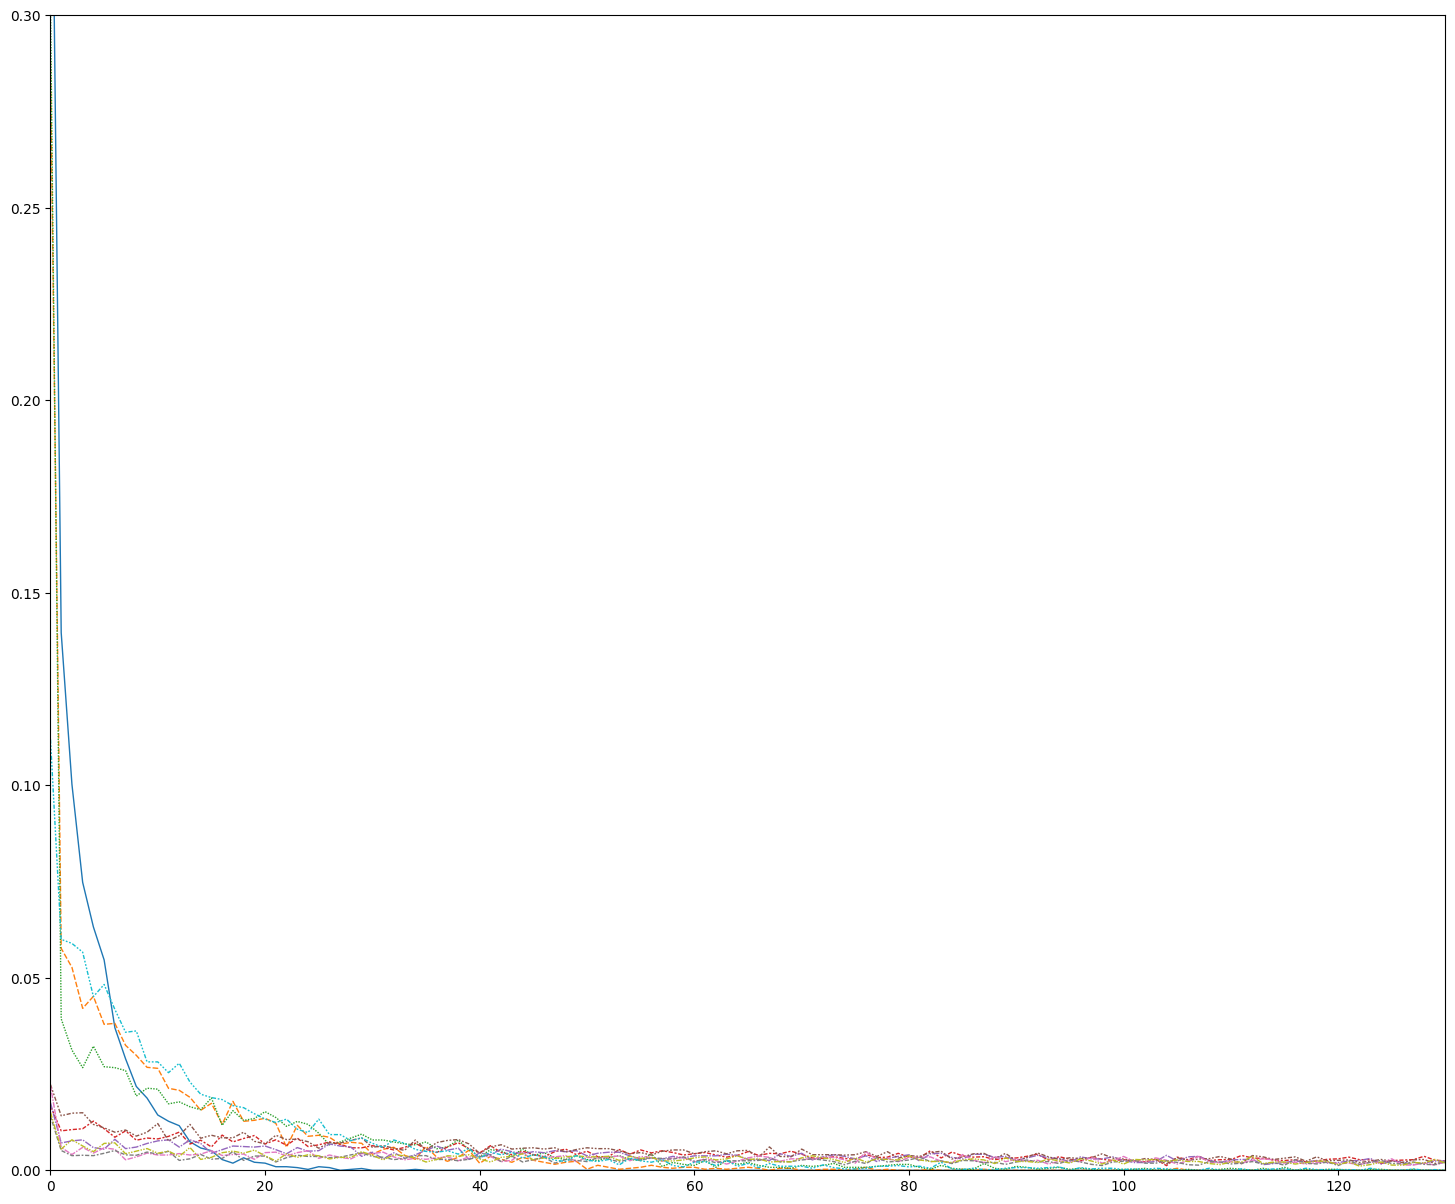

In [28]:
fig, ax = plt.subplots(figsize=(18, 15))
fig = sns.lineplot( data=df_wait_time,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.3)
plt.show()

In [29]:
df_scatter =  df_res.select_dtypes(include=['float64','int64'])[[
'os_mean',
'os_std',
#'os_q95',
#'os_q99',
'os_var',
'wt_mean',
'wt_std',
'wt_var',
#'wt_q95',
#'wt_q99',
]]

In [30]:
df_scatter = df_scatter.dropna(axis=0)
df_scatter = df_scatter.reset_index(drop=True)

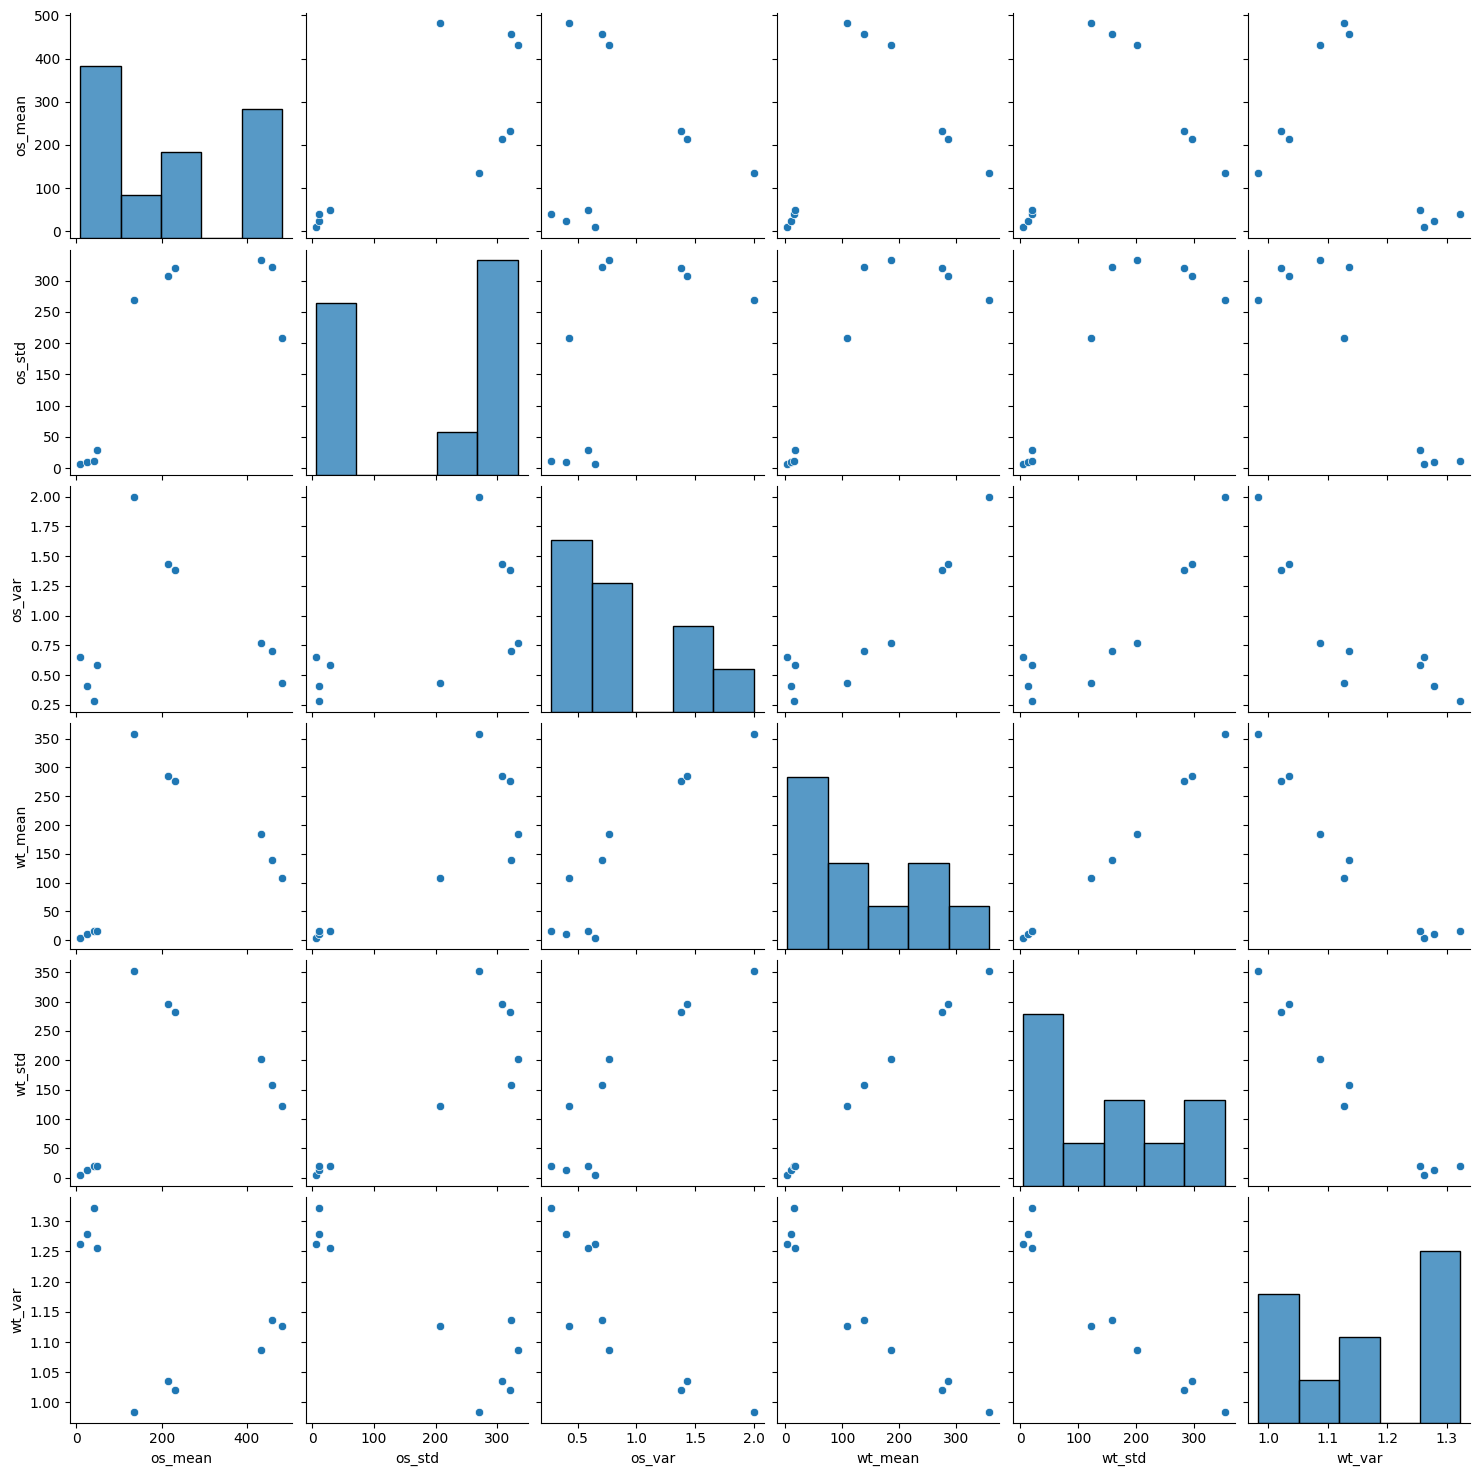

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_scatter)
plt.show()

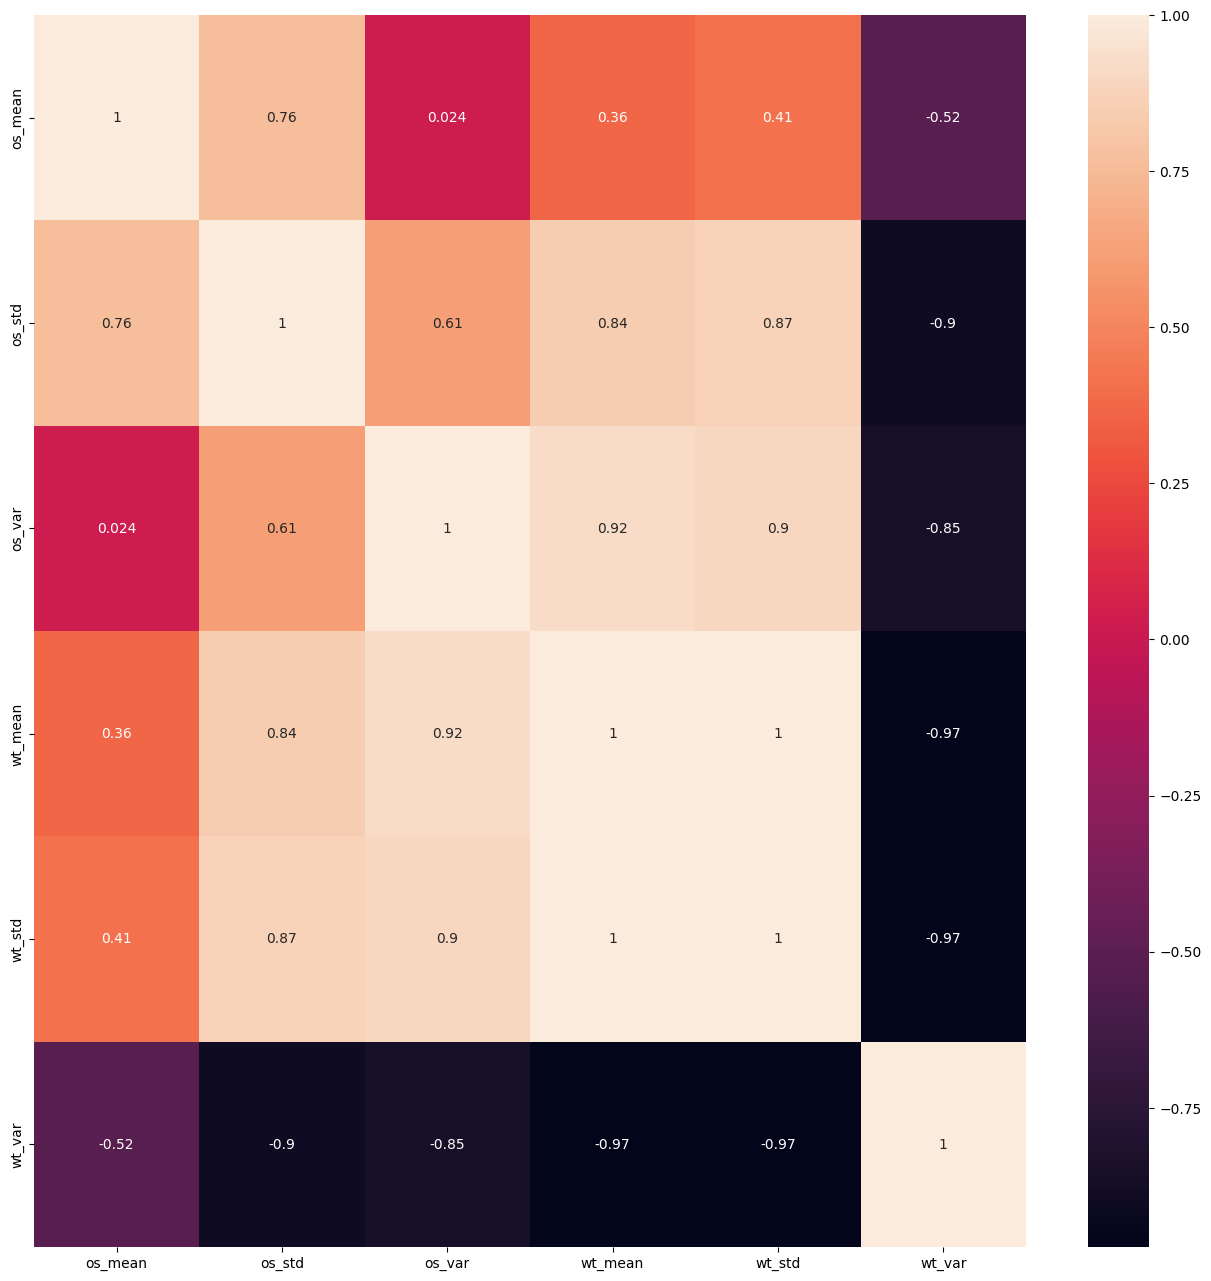

In [32]:
kol_corr_pirson = df_scatter.corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(kol_corr_pirson[abs(kol_corr_pirson)>0.0], annot = True);